In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf.utils import load_inst_zeropoints


In [2]:
pixscale=0.2

In [3]:
con = sqlite3.connect('baseline_v4.1_10yrs.db')
data = pd.read_sql("select skyBrightness,visitExposureTime,numExposures,filter,scheduler_note from observations", con)
con.close()

In [4]:
data["skyBrightness"]

0          21.027957
1          21.020817
2          20.985256
3          21.017650
4          21.004115
             ...    
2040522    18.390170
2040523    18.684546
2040524    18.704524
2040525    18.450418
2040526    18.636580
Name: skyBrightness, Length: 2040527, dtype: float64

In [5]:
zeropoints, k_atm = load_inst_zeropoints()

In [6]:
zeropoints

{'u': 26.43113567696435,
 'g': 28.466167127068015,
 'r': 28.33606807369919,
 'i': 28.155804618076573,
 'z': 27.7701164779691,
 'y': 26.79541324252779}

In [7]:
sky_counts = np.zeros(data["filter"].values.size, dtype=float)


for filtername in zeropoints.keys():
    in_filt = np.where(data["filter"].values == filtername)[0]
    
    sky_counts[in_filt] = (10.0 ** (0.4 * (zeropoints[filtername] - data["skyBrightness"][in_filt]))
                    * pixscale**2
                )
    # Total sky counts in each exposure
    exptime = data["visitExposureTime"].values[in_filt]/data["numExposures"][in_filt]
    sky_counts[in_filt] = sky_counts[in_filt] * exptime

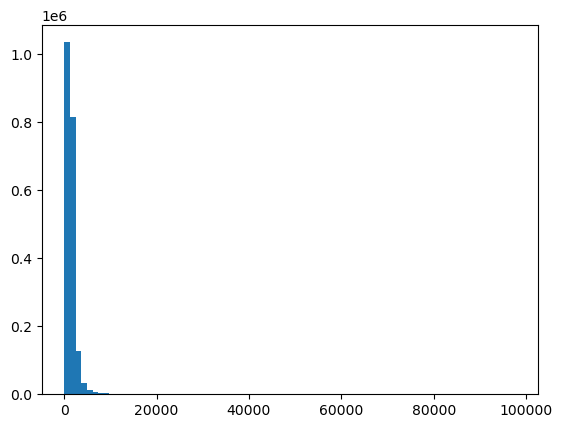

In [8]:
_ack = plt.hist(sky_counts, bins=80)

In [9]:
sky_counts.max()

97666.52951103727

In [10]:
temp = data["scheduler_note"].values[np.where(sky_counts > 30000)[0]]

In [11]:
[ack for ack in temp if 'ToO' not in ack]

[]